In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
for i in range(1,21):
    df = pd.read_json('http://ddragon.leagueoflegends.com/cdn/9.{}.1/data/en_US/champion.json'.format(i))

In [3]:
champs = []
for champ in df.index:
    temp_df = pd.DataFrame.from_dict(df.loc[champ, "data"]['stats'], orient='index').reset_index().pivot(columns='index')
    temp_df.columns = temp_df.columns.droplevel()
    temp_df[champ] = champ
    temp_df = temp_df.groupby(champ).mean()
    champs.append(temp_df.copy())
df = df.merge(pd.concat(champs), left_index=True, right_index=True, how='outer').drop(columns=['format', 'data'])

In [4]:
pd.concat(champs)

index,armor,armorperlevel,attackdamage,attackdamageperlevel,attackrange,attackspeed,attackspeedperlevel,crit,critperlevel,hp,hpperlevel,hpregen,hpregenperlevel,movespeed,mp,mpperlevel,mpregen,mpregenperlevel,spellblock,spellblockperlevel
Aatrox,38.000,3.25,60.0000,5.00,175.0,0.651,2.500,0.0,0.0,580.00,90.0,3.0,1.00,345.0,0.0,0.0,0.000,0.000,32.1,1.25
Ahri,20.880,3.50,53.0400,3.00,550.0,0.668,2.000,0.0,0.0,526.00,92.0,6.5,0.60,330.0,418.0,25.0,8.000,0.800,30.0,0.50
Akali,23.000,3.50,62.4000,3.30,125.0,0.625,3.200,0.0,0.0,575.00,95.0,8.0,0.50,345.0,200.0,0.0,50.000,0.000,37.0,1.25
Alistar,44.000,3.50,61.1116,3.62,125.0,0.625,2.125,0.0,0.0,573.36,106.0,8.5,0.85,330.0,350.0,40.0,8.500,0.800,32.1,1.25
Amumu,33.000,3.80,53.3800,3.80,125.0,0.736,2.180,0.0,0.0,613.12,84.0,9.0,0.85,335.0,287.2,40.0,7.382,0.525,32.1,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zed,32.000,3.50,63.0000,3.40,125.0,0.651,3.300,0.0,0.0,584.00,85.0,7.0,0.65,345.0,200.0,0.0,50.000,0.000,32.1,1.25
Ziggs,21.544,3.30,54.2080,3.10,550.0,0.656,2.000,0.0,0.0,536.00,92.0,6.5,0.60,325.0,480.0,23.5,8.000,0.800,30.0,0.50
Zilean,24.000,3.80,51.6400,3.00,550.0,0.625,2.130,0.0,0.0,504.00,82.0,5.5,0.50,335.0,452.0,30.0,11.335,0.800,30.0,0.50
Zoe,20.800,3.50,58.0000,3.30,550.0,0.625,2.500,0.0,0.0,560.00,92.0,6.5,0.60,340.0,425.0,25.0,8.000,0.650,30.0,0.50


In [5]:
df.drop(columns=['format', 'data'])

,type,version,armor,armorperlevel,attackdamage,attackdamageperlevel,attackrange,attackspeed,attackspeedperlevel,crit,...,hpperlevel,hpregen,hpregenperlevel,movespeed,mp,mpperlevel,mpregen,mpregenperlevel,spellblock,spellblockperlevel
Aatrox,champion,9.20.1,38.000,3.25,60.0000,5.00,175.0,0.651,2.500,0.0,...,90.0,3.0,1.00,345.0,0.0,0.0,0.000,0.000,32.1,1.25
Ahri,champion,9.20.1,20.880,3.50,53.0400,3.00,550.0,0.668,2.000,0.0,...,92.0,6.5,0.60,330.0,418.0,25.0,8.000,0.800,30.0,0.50
Akali,champion,9.20.1,23.000,3.50,62.4000,3.30,125.0,0.625,3.200,0.0,...,95.0,8.0,0.50,345.0,200.0,0.0,50.000,0.000,37.0,1.25
Alistar,champion,9.20.1,44.000,3.50,61.1116,3.62,125.0,0.625,2.125,0.0,...,106.0,8.5,0.85,330.0,350.0,40.0,8.500,0.800,32.1,1.25
Amumu,champion,9.20.1,33.000,3.80,53.3800,3.80,125.0,0.736,2.180,0.0,...,84.0,9.0,0.85,335.0,287.2,40.0,7.382,0.525,32.1,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zed,champion,9.20.1,32.000,3.50,63.0000,3.40,125.0,0.651,3.300,0.0,...,85.0,7.0,0.65,345.0,200.0,0.0,50.000,0.000,32.1,1.25
Ziggs,champion,9.20.1,21.544,3.30,54.2080,3.10,550.0,0.656,2.000,0.0,...,92.0,6.5,0.60,325.0,480.0,23.5,8.000,0.800,30.0,0.50
Zilean,champion,9.20.1,24.000,3.80,51.6400,3.00,550.0,0.625,2.130,0.0,...,82.0,5.5,0.50,335.0,452.0,30.0,11.335,0.800,30.0,0.50
Zoe,champion,9.20.1,20.800,3.50,58.0000,3.30,550.0,0.625,2.500,0.0,...,92.0,6.5,0.60,340.0,425.0,25.0,8.000,0.650,30.0,0.50


Graphing across Dataframes?

In [8]:
season = []
for i in range(1,21):
    df = pd.read_json('http://ddragon.leagueoflegends.com/cdn/9.{}.1/data/en_US/champion.json'.format(i))
    champs = []
    for champ in df.index:
        temp_df = pd.DataFrame.from_dict(df.loc[champ, "data"]['stats'], orient='index').reset_index().pivot(columns='index')
        temp_df.columns = temp_df.columns.droplevel()
        temp_df[champ] = champ
        temp_df = temp_df.groupby(champ).mean()
        champs.append(temp_df.copy())
    df = df.merge(pd.concat(champs), left_index=True, right_index=True, how='outer').drop(columns=['format', 'data'])
    season.append(df)
season9 = pd.concat(season)

In [10]:
season9

,type,version,armor,armorperlevel,attackdamage,attackdamageperlevel,attackrange,attackspeed,attackspeedperlevel,crit,...,hpperlevel,hpregen,hpregenperlevel,movespeed,mp,mpperlevel,mpregen,mpregenperlevel,spellblock,spellblockperlevel
Aatrox,champion,9.1.1,33.000,3.25,60.0000,5.00,175.0,0.651,2.500,0.0,...,80.0,5.0,0.25,345.0,0.00,0.0,0.000,0.000,32.1,1.25
Ahri,champion,9.1.1,20.880,3.50,53.0400,3.00,550.0,0.668,2.000,0.0,...,92.0,6.5,0.60,330.0,418.00,25.0,8.000,0.800,30.0,0.50
Akali,champion,9.1.1,23.000,3.50,62.4000,3.30,125.0,0.625,3.200,0.0,...,85.0,3.5,0.50,345.0,200.00,0.0,50.000,0.000,32.1,1.25
Alistar,champion,9.1.1,44.000,3.50,61.1116,3.62,125.0,0.625,2.125,0.0,...,106.0,8.5,0.85,330.0,278.84,38.0,8.500,0.800,32.1,1.25
Amumu,champion,9.1.1,33.000,3.80,53.3800,3.80,125.0,0.736,2.180,0.0,...,84.0,9.0,0.85,335.0,287.20,40.0,7.382,0.525,32.1,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zed,champion,9.20.1,32.000,3.50,63.0000,3.40,125.0,0.651,3.300,0.0,...,85.0,7.0,0.65,345.0,200.00,0.0,50.000,0.000,32.1,1.25
Ziggs,champion,9.20.1,21.544,3.30,54.2080,3.10,550.0,0.656,2.000,0.0,...,92.0,6.5,0.60,325.0,480.00,23.5,8.000,0.800,30.0,0.50
Zilean,champion,9.20.1,24.000,3.80,51.6400,3.00,550.0,0.625,2.130,0.0,...,82.0,5.5,0.50,335.0,452.00,30.0,11.335,0.800,30.0,0.50
Zoe,champion,9.20.1,20.800,3.50,58.0000,3.30,550.0,0.625,2.500,0.0,...,92.0,6.5,0.60,340.0,425.00,25.0,8.000,0.650,30.0,0.50


In [38]:
master_df = season9.copy()

In [39]:
master_df.reset_index(inplace=True)

In [47]:
master_df.to_pickle('season9.pkl')

In [41]:
master_df.rename(columns={'index':'champion'}, inplace=True)

In [44]:
master_df.groupby('version').mean().reset_index()

,version,armor,armorperlevel,attackdamage,attackdamageperlevel,attackrange,attackspeed,attackspeedperlevel,crit,critperlevel,...,hpperlevel,hpregen,hpregenperlevel,movespeed,mp,mpperlevel,mpregen,mpregenperlevel,spellblock,spellblockperlevel
0,9.1.1,30.026394,3.492254,59.448433,3.264131,321.161972,0.648690,2.451669,0.0,0.0,...,88.558099,6.603873,0.658099,336.394366,307.868028,32.010563,8.418697,0.555106,31.080282,0.890845
1,9.10.1,30.032000,3.480556,59.338524,3.253865,321.736111,0.648097,2.459979,0.0,0.0,...,88.355903,6.592014,0.660069,336.409722,308.258750,32.399306,8.384472,0.557118,31.115278,0.894444
2,9.11.1,30.032000,3.480556,59.356719,3.253865,321.736111,0.647722,2.459979,0.0,0.0,...,88.397569,6.592014,0.660069,336.409722,308.258750,32.399306,8.401833,0.557118,31.115278,0.894444
3,9.12.1,30.129222,3.482292,59.398385,3.246921,321.736111,0.647889,2.451646,0.0,0.0,...,88.480903,6.598958,0.663194,336.479167,308.258750,32.399306,8.415722,0.557118,31.114583,0.896181
4,9.13.1,30.100745,3.475517,59.423224,3.246459,320.551724,0.647731,2.449221,0.0,0.0,...,88.491379,6.612069,0.663103,336.468966,308.362069,32.589655,8.412731,0.558103,31.121379,0.896897
5,9.14.1,30.066262,3.475517,59.350507,3.258183,320.379310,0.647145,2.452669,0.0,0.0,...,88.546552,6.601724,0.666552,336.468966,308.383862,32.800000,8.412731,0.558103,31.155172,0.896897
6,9.15.1,30.066262,3.475517,59.350507,3.258183,320.379310,0.647145,2.452669,0.0,0.0,...,88.567241,6.615517,0.666552,336.468966,308.383862,32.800000,8.412731,0.558103,31.155172,0.896897
7,9.16.1,30.100745,3.474483,59.320714,3.257494,320.551724,0.646786,2.453290,0.0,0.0,...,88.622414,6.629310,0.666552,336.400000,308.694207,32.800000,8.414193,0.558103,31.155172,0.896897
8,9.17.1,30.100745,3.474483,59.355197,3.257494,320.551724,0.646786,2.453290,0.0,0.0,...,88.622414,6.629310,0.666552,336.400000,308.819724,32.868966,8.415331,0.558103,31.182759,0.896897
9,9.18.1,30.080055,3.471034,59.388438,3.257494,320.551724,0.646786,2.453290,0.0,0.0,...,88.567241,6.629310,0.666552,336.400000,308.795172,32.868966,8.412297,0.558103,31.182759,0.896897


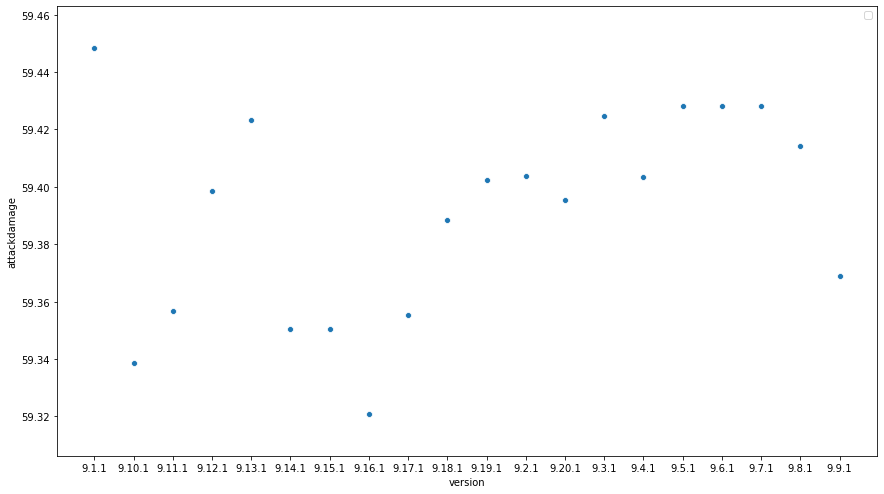

In [46]:
plt.figure(figsize=[14.70, 8.27])
sb.scatterplot(data=master_df.groupby('version').mean().reset_index(), y='attackdamage', x='version')
plt.legend('');